In [1]:
import pandas
data = pandas.read_csv("finanziamenti.csv", sep=";", decimal=",")
data.loc[:5,:]

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
0,4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
1,38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
2,39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
3,43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
4,73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,10688.70,10688.70,NaN
5,106,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,13060.00,13060.00,NaN


In [ ]:
array(dim=c(3,3,3))

1. Il carattere CodiceCategoria è nominale, ordinale o scalare? Giustificate la risposta.
        è nominale pur essendo codificato come un intero in quando rappresenta una categoria.

2. Calcolate la tabella delle frequenze assolute del carattere UNITA.

In [2]:
freqs = data.UNITA.value_counts()
print(freqs)

PERUGIA                 1005
TERNI                    638
FOLIGNO                  449
CITTA DI CASTELLO        288
SLL NON ATTRIBUIBILE     255
ASSISI                   243
SPOLETO                  186
UMBERTIDE                124
TODI                     117
GUBBIO                    76
CASTIGLIONE DEL L         75
GUALDO TADINO             75
ORVIETO                   60
CHIUSI                    30
NORCIA                    28
CASCIA                    13
SLL MULTIPLO               5
CORTONA                    1
Name: UNITA, dtype: int64


3. Tracciate un grafico opportuno per descrivere il carattere UNITA.

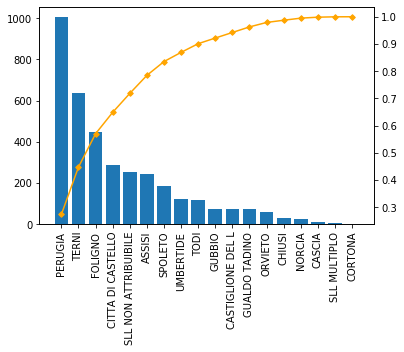

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(range(len(freqs.values)),freqs.values)    
# set the bars
ax.set_xticks(range(len(freqs.values)))          
# set where to put labels
ax.set_xticklabels(freqs.keys(),rotation=90)    
# set the labels and how to write them

ax2 = ax.twinx()
ax2.plot(range(len(freqs.values)), freqs.cumsum()
         /sum(freqs.values), color="orange", marker="D", ms=4)

plt.show()

# una valida alternativa è il grafico a torta
# una (meno) valida alternativa è un barplot semplice

4. La Figura 1 mostra la funzione di ripartizione empirica per un sotto-insieme delle osservazioni relativi al carattere TotSpese, in cui gli importi sono indicati in centinaia dimigliaia di Euro. Leggendo esclusivamente il grafico:  
    4.1. indicate quale sottoinsieme di osservazioni è stato utilizzato;

(0, 40)

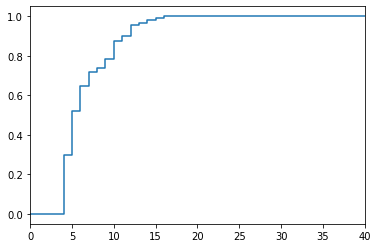

In [5]:
import numpy

# calcoliamo la selezione dei dati che ci interessa ###
subselection  = data.loc[(data.TotSpese.notna()) &
                (data.TotSpese>=5*10**5) & 
               (data.TotSpese<=2*10**6),].TotSpese

# normaliziamo la selezione, i valori sono espressi in 
#centinaia di migliaia
normselection = numpy.floor(subselection/10**5).astype(int)

# contiamo le occorrenze
freqselection = normselection.value_counts()

# ordiniamo
freqs = freqselection.iloc[numpy.argsort(freqselection.keys())]

# calcoliamo la cumulativa 
ecdf = freqs.cumsum()/freqs.sum()


# aggiungiamo gli estremi al fine di avere un plot migliore
x = [0,4] + list(ecdf.keys()) + [40]
y = [0.0,0.0] + list(ecdf.values) + [1.0]

fig, ax = plt.subplots()
ax.step(x,y)
ax.set_xlim((0,40))

4.2. specificate quale percentuale delle osservazioni visualizzate assume un valore compreso tra uno (escluso) e due milioni di Euro.

In [6]:
print((ecdf[min(20, max(ecdf.keys()))]-ecdf[10]))
print(len(data.loc[(data.TotSpese.notna()) &
                   (data.TotSpese>=11*10**5) & 
                   (data.TotSpese<=2*10**6),])/110)

0.21818181818181814
0.21818181818181817


5. Prendiamo in considerazione la quota di finanziamento erogata dalla Provincia.  
    5.1. Create una variabile (chiamatela progetti_a, per indicare i progetti di tipo A) che contenga la parte di dataset relativa ai progetti per i quali la quota provinciale di finanziamento è minore di quella regionale, e un’altra (chiamata progetti_b, per indicare i progetti di tipo B) che contenga la parte di dataset relativa ai progetti per i quali la quota provinciale di finanziamento è maggiore di quella regionale.

In [7]:
progetti_a = data.loc[(data.FinProvincia.notna()) & 
                      (data.FinRegione.notna()) & 
                      (data.FinProvincia < data.FinRegione),]
progetti_b = data.loc[(data.FinProvincia.notna()) & 
                      (data.FinRegione.notna()) & 
                      (data.FinProvincia > data.FinRegione),]

5.2. Quanti sono progetti di tipo A? Quanti sono progetti di tipo B?

In [7]:
print(progetti_a.__len__())
print(progetti_b.__len__())

368
175


6. Concentriamoci sui progetti di tipo A.  
    6.1. Selezionate i progetti di tipo A che hanno ricevuto un finanziamento provinciale compreso tra i 200 e i 1000 euro, estremo sinistro incluso, e salvate questa parte di dataset in una variabile chiamata selezione_progetti_a.

In [10]:
selezione_progetti_a = progetti_a.loc[(progetti_a.FinProvincia>=200) & 
                                      (progetti_a.FinProvincia<1000),]

id                 2907.526316
TemaPrioritario      69.736842
CodiceCategoria      41.421053
FinProvincia        636.905263
FinRegione          702.587895
TotSpese           3548.256250
dtype: float64

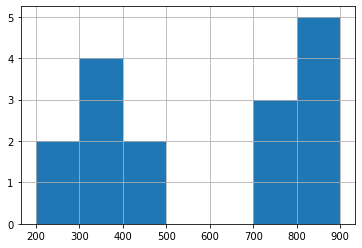

In [9]:
progetti_a=data[(data['FinProvincia']<data['FinRegione']) & 
                (data.FinRegione.notna()) & 
                (data.FinProvincia.notna())]
selezione_progetti_a=progetti_a[(progetti_a['FinProvincia']>=200) &
                                (progetti_a['FinProvincia']<1000)]
selezione_progetti_a.FinProvincia.hist(bins=numpy.arange(200,1000,100))
selezione_progetti_a.mean()

6.2. Tracciate un istogramma del finanziamento provinciale di tali progetti, imponendo che le classi abbiano ampiezza 100 euro

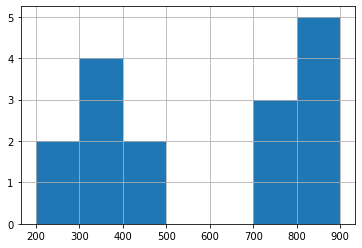

In [12]:
p = selezione_progetti_a.FinProvincia.hist(bins=numpy.arange(200,1000,100))

6.3. Tracciate anche il boxplot per la medesima quantità.

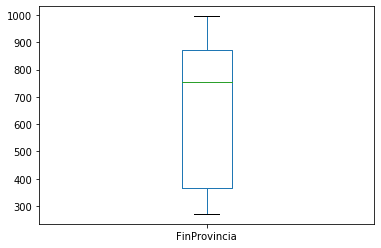

In [10]:
p = selezione_progetti_a.FinProvincia.plot.box()

6.4. Tra i due grafici appena prodotti, quale ritenete maggiormente informativo? Giusti-ficate la risposta.  

        Sicuramente l'istogramma in quanto riesce ad rappresentare meglio la distribuzione evidenziando la bimodalità.
6.5. Relativamente a tali progetti, qual è stato l’importo medio finanziato dalla provincia? Quale la deviazione standard?

In [11]:
print(selezione_progetti_a.FinProvincia.mean())
print(selezione_progetti_a.FinProvincia.std())

636.9052631578948
264.80233322588253


6.6. Quanti hanno ricevuto un finanziamento provinciale compreso tra i 500 e i 700 euro?

In [13]:
len(selezione_progetti_a.loc[(selezione_progetti_a.FinProvincia >= 500) & 
                             (selezione_progetti_a.FinProvincia <= 700),])
# oppure lo si può anche vedere dal rispettivo istogramma

0

6.7. Esiste una evidente relazione tra finanziamento provinciale e spese sostenute. Descrivete tale relazione nel modo più dettagliato possibile, utilizzando un indice numerico e un metodo grafico.

,FinProvincia,TotSpese
FinProvincia,1.000000,0.696401
TotSpese,0.696401,1.000000


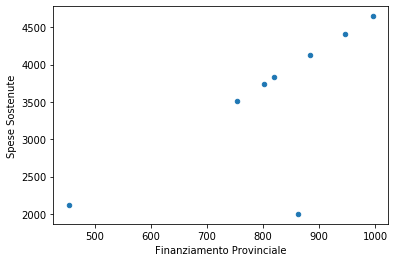

In [13]:
p = selezione_progetti_a.plot.scatter("FinProvincia","TotSpese")
p.set_xlabel("Finanziamento Provinciale")
p.set_ylabel("Spese Sostenute")

selezione_progetti_a.loc[:,["FinProvincia","TotSpese"]].corr()


C'è una relazione lineare tra il finanziamento provinciale e le spese totali ad eccezione di un outlier che abbassa il coefficiente di correlazione.


6.8. Nella relazione avrete notato la presenza di almeno un progetto che si discosta note-volmente dall’andamento più generale. Eliminate tali progetti dall’insieme dei dati e rispondete nuovamente alle domande del punto precedente.  

        vediamo che l'outlier appare avere TotSpese 2000.0 eliminiamo dunque tutti i punti che hanno TotSpese inferiori a questa quantità.

In [14]:
selezione_progetti_a.loc[(selezione_progetti_a.TotSpese.notna()) &
                         (selezione_progetti_a.TotSpese > 2000) ,
                         ["FinProvincia","TotSpese"]].corr()

,FinProvincia,TotSpese
FinProvincia,1.0,1.0
TotSpese,1.0,1.0


ora la relazione appare perfettamente lineare.

.7. Ritorniamo al dataset completo. Quanti sono i progetti che non hanno ancora sostenuto spese?

In [15]:
len(data.loc[(data.TotSpese == 0) | (data.TotSpese.isna()), ])

1134